<a href="https://colab.research.google.com/github/jediProgramer/CrudRetrofit/blob/master/AGRI_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [204]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [205]:
# Importing the libraries
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [206]:
import matplotlib.pyplot as plt

**Ambil Data Set Jagung Khusus Provinsi Jawa Barat**

In [207]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [208]:
#ubah pathnya sesuai lokasi dataset 
df=pd.read_csv('/content/drive/MyDrive/DIGI-PROA-ML-TF/TUBES/DATASET/Jagung_Jabar.csv',sep=';',header=None, names=['years','yield_stok'])

##Explore Dataset

In [209]:
df.head()

,years,yield_stok
0,1993,274181
1,1994,273919
2,1995,332179
3,1996,344242
4,1997,336014


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   years       23 non-null     int64
 1   yield_stok  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [211]:
import plotly.express as px

fig = px.line(df, x="years", y="yield_stok", title='Yield Stok Jawa Barat State Time Series')
fig.show();

**LSTM**

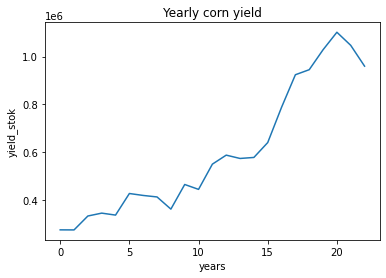

In [212]:
df = df.iloc[:,1].values
plt.plot(df)
plt.xlabel("years")
plt.ylabel("yield_stok")
plt.title("Yearly corn yield")
plt.show()

In [213]:
df = df.reshape(-1,1)
df = df.astype("float32")
df.shape

(23, 1)

In [241]:
# scaling 
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

In [242]:
train_size = int(len(df) * 0.75)
test_size = len(df) - train_size
train = df[0:train_size,:]
test = df[train_size:len(df),:]
print("train size: {}, test size: {} ".format(len(train), len(test)))

train size: 17, test size: 6 


In [243]:
time_stamp = 2

dataX = []
dataY = []

for i in range(len(train)-time_stamp-1):
    a = train[i:(i+time_stamp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stamp, 0])
    
trainX = np.array(dataX)
trainY = np.array(dataY)  

In [244]:
dataX = []
dataY = []
for i in range(len(test)-time_stamp-1):
    a = test[i:(i+time_stamp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stamp, 0])
testX = np.array(dataX)
testY = np.array(dataY) 

In [245]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [246]:
model = Sequential()

model.add(LSTM(10, input_shape=(1, time_stamp))) # 10 lstm neuron
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', run_eagerly=True)

model.fit(trainX, trainY, epochs=50, batch_size=1)

Epoch 1/50
14/14 [==============================] - 0s 16ms/step - loss: 0.0717
Epoch 2/50
14/14 [==============================] - 0s 16ms/step - loss: 0.0580
Epoch 3/50
14/14 [==============================] - 0s 19ms/step - loss: 0.0460
Epoch 4/50
14/14 [==============================] - 0s 17ms/step - loss: 0.0372
Epoch 5/50
14/14 [==============================] - 0s 16ms/step - loss: 0.0298
Epoch 6/50
14/14 [==============================] - 0s 16ms/step - loss: 0.0237
Epoch 7/50
14/14 [==============================] - 0s 16ms/step - loss: 0.0197
Epoch 8/50
14/14 [==============================] - 0s 16ms/step - loss: 0.0163
Epoch 9/50
14/14 [==============================] - 0s 17ms/step - loss: 0.0139
Epoch 10/50
14/14 [==============================] - 0s 16ms/step - loss: 0.0122
Epoch 11/50
14/14 [==============================] - 0s 17ms/step - loss: 0.0112
Epoch 12/50
14/14 [==============================] - 0s 17ms/step - loss: 0.0104
Epoch 13/50
14/14 [==================

In [247]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.06 RMSE
Test Score: 0.25 RMSE


In [248]:
# shifting train
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_stamp:len(trainPredict)+time_stamp, :] = trainPredict

# shifting test
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_stamp*2)+1:len(df)-1, :] = testPredict

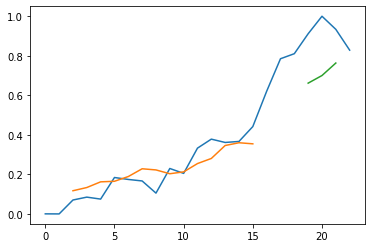

In [249]:
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()